In [1]:
#Main Libraries
import pandas as pd
import numpy as np
import itertools


#Sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

#Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

#Grid search and progress bar
from tqdm.notebook import tqdm_notebook as tqdm


# SVM with Linear dataset (Iris)

In [8]:
iris = datasets.load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [13]:
X= iris.data[:, [0,2]] #we want the first annd the third features sepal length and petal width
y = iris.target

X, y = shuffle_arrays_unison(arrays=[X,y], random_seed=42) #returns x and y after shuffling
#Standardize the X by removing the mean and scaling to unit variance
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]


# Train the SVM classifier

In [14]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

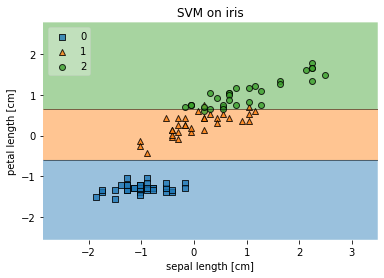

In [15]:
#Plot decision regions
plot_decision_regions(X_train, y_train, clf=svm, legend=2)

#Adding axes notations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on iris')
plt.show()

# Trying different combinations

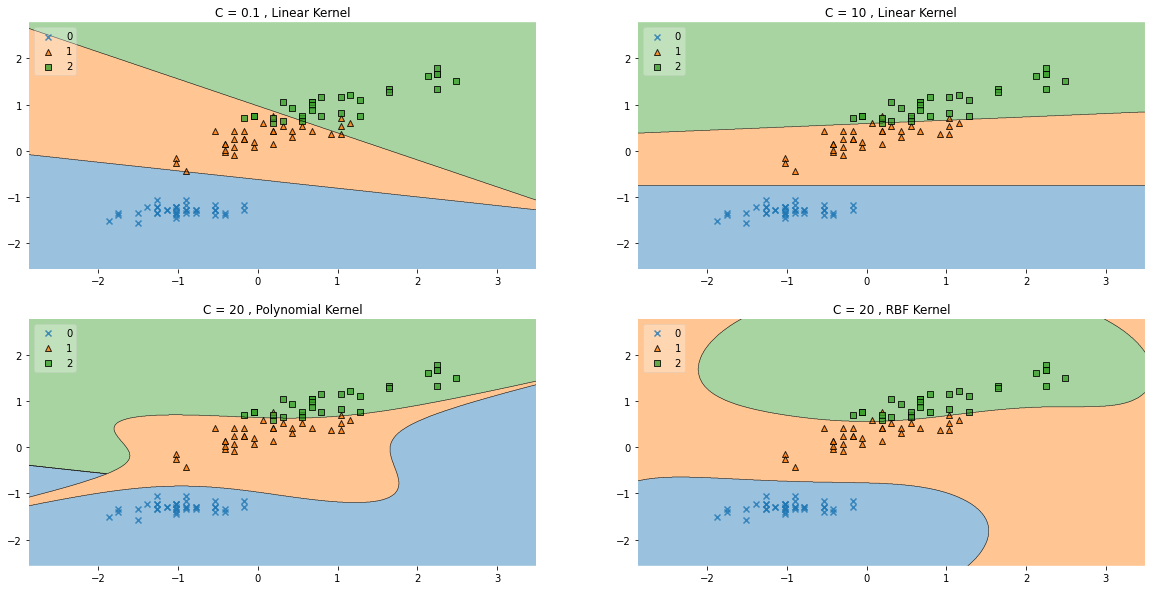

In [19]:
gs = gridspec.GridSpec(2,2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1=SVC(C=0.1, kernel = 'linear')
clf2=SVC(C=10, kernel = 'linear')
clf3=SVC(C=20, kernel = 'poly')
clf4=SVC(C=20, kernel = 'rbf')
scatter_highlight_kwargs = {'s':50, 'label':'Test Data', 'alpha': 0.7, 'linestyle':'-'}
labels=['C = 0.1 , Linear Kernel', 'C = 10 , Linear Kernel', 'C = 20 , Polynomial Kernel', 'C = 20 , RBF Kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0,1], repeat=2)):
    clf.fit(X_train, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)
    
plt.show()

# SVM with nonlinear dataset

In [22]:
#Generate the dataset using XOR gate
np.random.seed(0) #to reproduce results
X_xor = np.random.randn(500, 2) #1000 numbers 500 by 2
y_xor = np.logical_xor(X_xor[:, 0] >0 , X_xor[:, 1] >0, dtype = int) #500 values either true or false
print(y_xor)
y_xor = np.where(y_xor, 1, 0) #mapping function map each True to be 1 False to be 0
print(y_xor)

[False False  True  True  True False False False  True  True  True  True
  True  True False False False  True False False False  True False  True
 False  True False  True False False False False  True  True  True False
  True  True False  True  True  True False  True  True  True False False
 False False  True  True  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True  True False
 False  True False  True False False  True False  True False  True False
 False False  True  True False  True False False  True  True  True  True
 False  True False False False False  True False  True False  True False
  True  True False  True  True False False False  True  True  True False
 False False False False False  True  True False False  True False False
  True False  True  True False False  True  True  True  True False  True
 False False  True  True False  True  True False  True False  True  True
 False  True False False False  True False  True  T

In [25]:
#Split the dataset

X_xor, y_xor = shuffle_arrays_unison(arrays=[X_xor, y_xor], random_seed=42)
X_train, y_train = X_xor[:400], y_xor[:400]
X_test, y_test = X_xor[400:], y_xor[400:]

C:\Users\Rush\.conda\envs\deeplearning\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


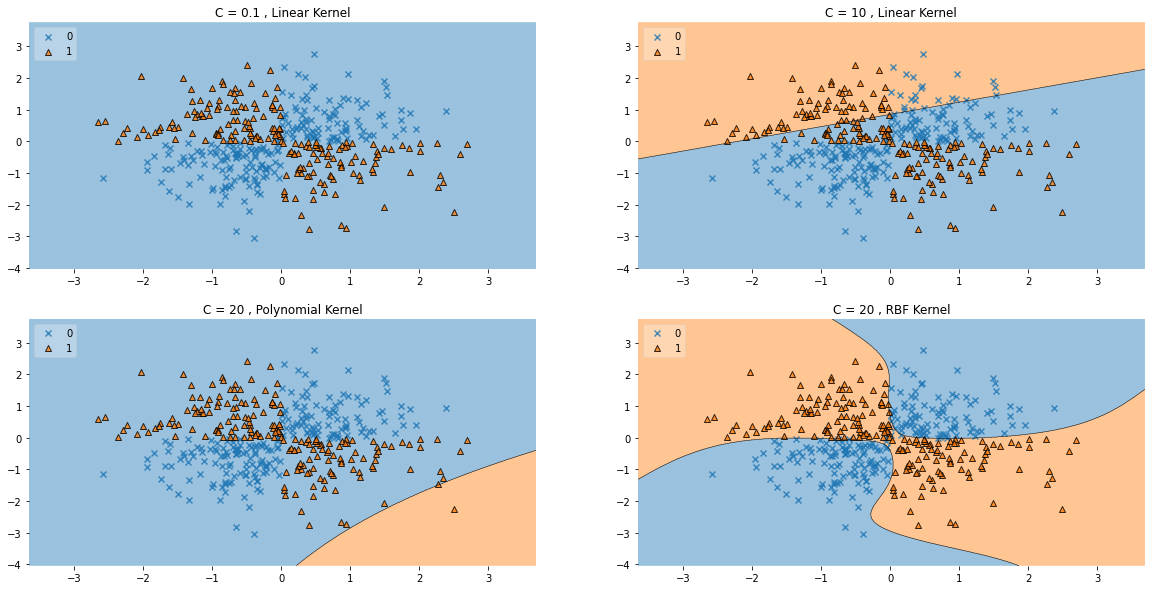

In [26]:
#Train the kernels
gs = gridspec.GridSpec(2,2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1=SVC(C=0.1, kernel = 'linear')
clf2=SVC(C=10, kernel = 'linear')
clf3=SVC(C=20, kernel = 'poly')
clf4=SVC(C=20, kernel = 'rbf')
scatter_highlight_kwargs = {'s':50, 'label':'Test Data', 'alpha': 0.7, 'linestyle':'-'}
labels=['C = 0.1 , Linear Kernel', 'C = 10 , Linear Kernel', 'C = 20 , Polynomial Kernel', 'C = 20 , RBF Kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0,1], repeat=2)):
    clf.fit(X_train, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)
    
plt.show()

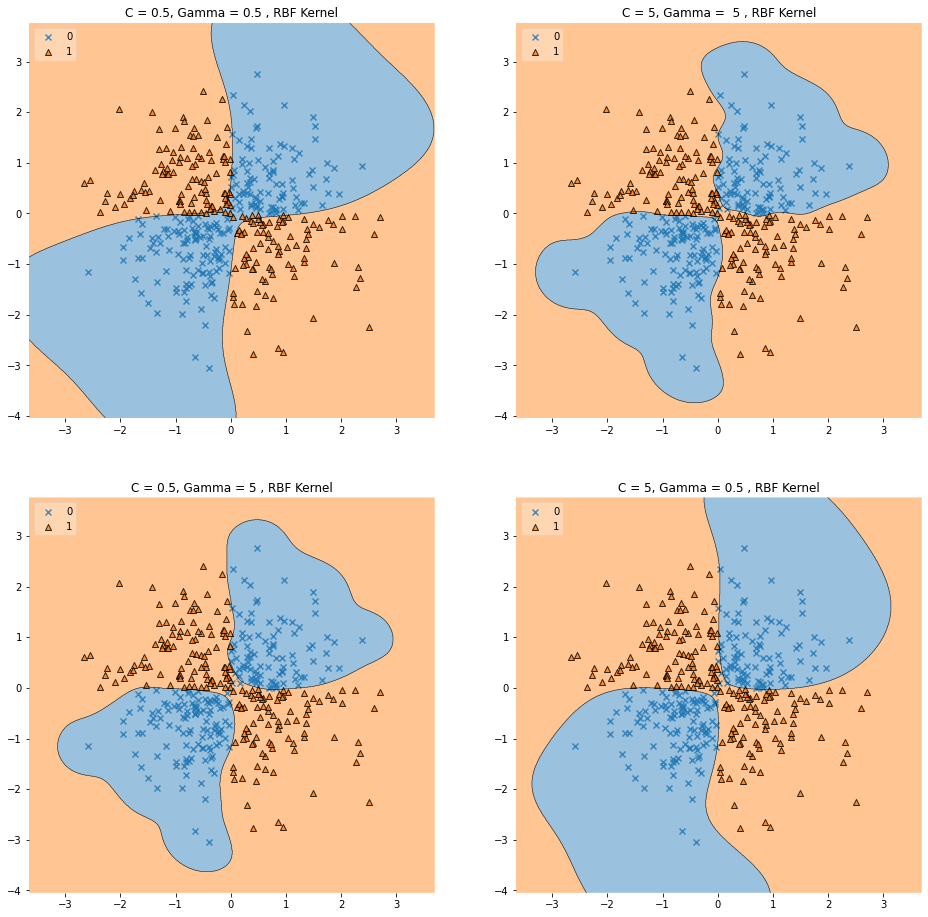

In [27]:
#Train the rbfs
gs = gridspec.GridSpec(2,2)

plt.rcParams['figure.figsize'] = (16, 16)

clf1=SVC(C=0.5, kernel = 'rbf', gamma= 0.5)
clf2=SVC(C=5, kernel = 'rbf', gamma = 5)
clf3=SVC(C=0.5, kernel = 'rbf', gamma = 5)
clf4=SVC(C=5, kernel = 'rbf', gamma = 0.5)
scatter_highlight_kwargs = {'s':50, 'label':'Test Data', 'alpha': 0.7, 'linestyle':'-'}
labels=['C = 0.5, Gamma = 0.5 , RBF Kernel', 'C = 5, Gamma =  5 , RBF Kernel', 'C = 0.5, Gamma = 5 , RBF Kernel', 'C = 5, Gamma = 0.5 , RBF Kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0,1], repeat=2)):
    clf.fit(X_train, y_train)
    ax= plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)
    
plt.show()